In [1]:
import os
import pandas as pd
from src.training import run_training_pipeline, get_predictions
from src.evaluation import evaluate_all_songs, plot_chord_transition_counts, plot_grouped_chord_timeline

In [2]:
def evaluate(results: dict[str, pd.DataFrame], example_song_name: str = "Twist_And_Shout"):
    evaluate_all_songs(results)
    plot_chord_transition_counts(results)
    plot_grouped_chord_timeline(results[example_song_name], example_song_name)

In [ ]:
# train on 40 songs

songs = []
for file_name in os.listdir('lab_and_audio_files'):
    if(file_name.endswith('.mp3')):
        song_name = file_name[:-4]
        songs.append(song_name)

h_markov_model, ix_2_chord = run_training_pipeline(songs[:40])

In [3]:
# predict on 10

results = {}
for song in songs[-10:]:
    results[song] = get_predictions(h_markov_model, ix_2_chord, song)

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?



🔹 **Chord Prediction Evaluation Across All Songs** 🔹

🎵 Lucy_In_The_Sky_With_Diamonds: Accuracy = 0.1821, F1-score = 0.2065
🎵 Twist_And_Shout: Accuracy = 0.3071, F1-score = 0.4152
🎵 Love_Me_Do: Accuracy = 0.2506, F1-score = 0.3123
🎵 Girl: Accuracy = 0.0168, F1-score = 0.0212
🎵 In_My_Life: Accuracy = 0.5025, F1-score = 0.5476
🎵 Eight_Days_a_Week: Accuracy = 0.2481, F1-score = 0.2918
🎵 Blue_Jay_Way: Accuracy = 0.4189, F1-score = 0.5487
🎵 The_Word: Accuracy = 0.1206, F1-score = 0.1609
🎵 Baby_You're_A_Rich_Man: Accuracy = 0.3574, F1-score = 0.4313
🎵 Octopus's_Garden: Accuracy = 0.0667, F1-score = 0.0789

🔹 **Overall Performance Across All Songs** 🔹
🎶 Overall Accuracy = 0.2547
🎶 Overall F1-score = 0.2960



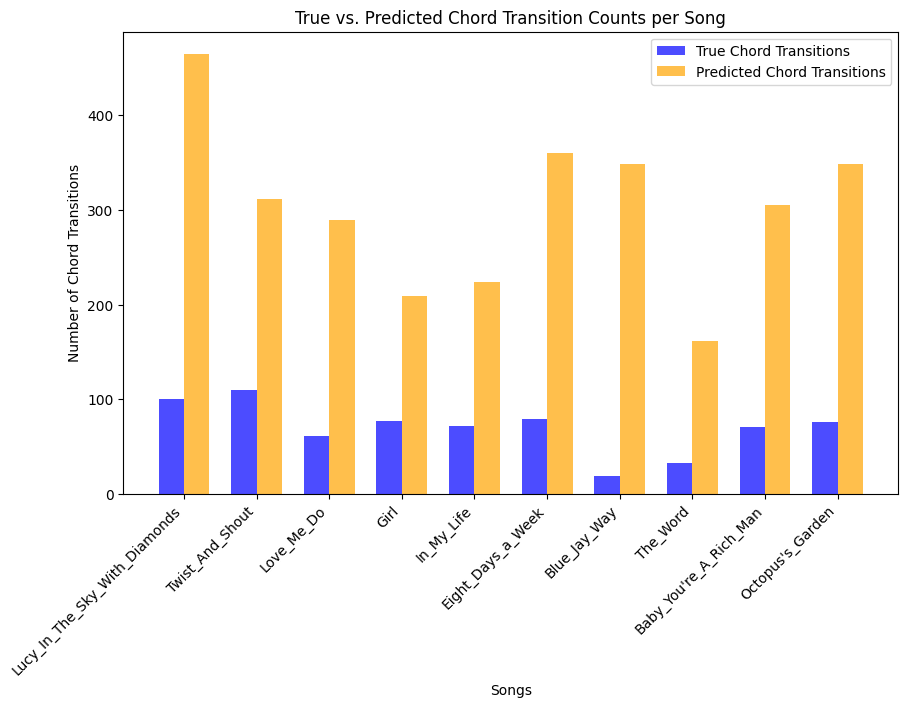

🔹 **Accuracy**: 0.3071
🔹 **F1-score**: 0.4152


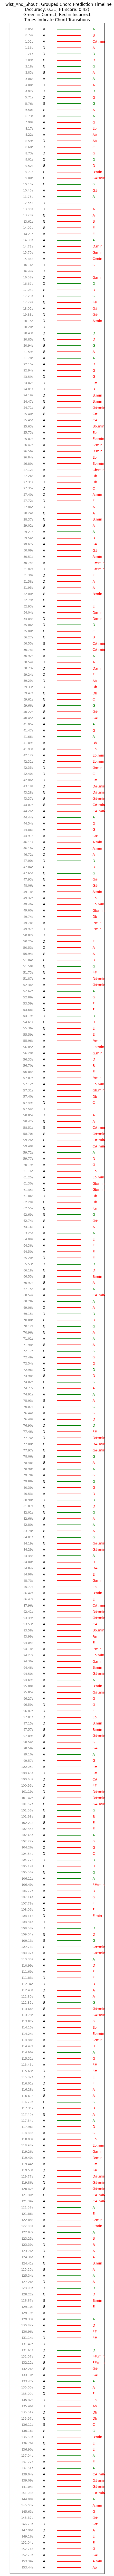

In [ ]:
evaluate(results)

We try removing the percussive information

In [7]:
# train on 40 songs

songs = []
for file_name in os.listdir('lab_and_audio_files'):
    if(file_name.endswith('.mp3')):
        song_name = file_name[:-4]
        print(f"processing: {song_name}")
        songs.append(song_name)

h_markov_model, ix_2_chord = run_training_pipeline(songs[:40], remove_percussive=True)

In [8]:
# predict on 10

results = {}
for song in songs[-10:]:
    results[song] = get_predictions(h_markov_model, ix_2_chord, song, remove_percussive=True)

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?



🔹 **Chord Prediction Evaluation Across All Songs** 🔹

🎵 Lucy_In_The_Sky_With_Diamonds: Accuracy = 0.1711, F1-score = 0.1921
🎵 Twist_And_Shout: Accuracy = 0.3595, F1-score = 0.4632
🎵 Love_Me_Do: Accuracy = 0.2167, F1-score = 0.2823
🎵 Girl: Accuracy = 0.0232, F1-score = 0.0253
🎵 In_My_Life: Accuracy = 0.4981, F1-score = 0.5629
🎵 Eight_Days_a_Week: Accuracy = 0.2879, F1-score = 0.3365
🎵 Blue_Jay_Way: Accuracy = 0.4269, F1-score = 0.5555
🎵 The_Word: Accuracy = 0.1389, F1-score = 0.1769
🎵 Baby_You're_A_Rich_Man: Accuracy = 0.3367, F1-score = 0.4368
🎵 Octopus's_Garden: Accuracy = 0.0816, F1-score = 0.0945

🔹 **Overall Performance Across All Songs** 🔹
🎶 Overall Accuracy = 0.2608
🎶 Overall F1-score = 0.3032



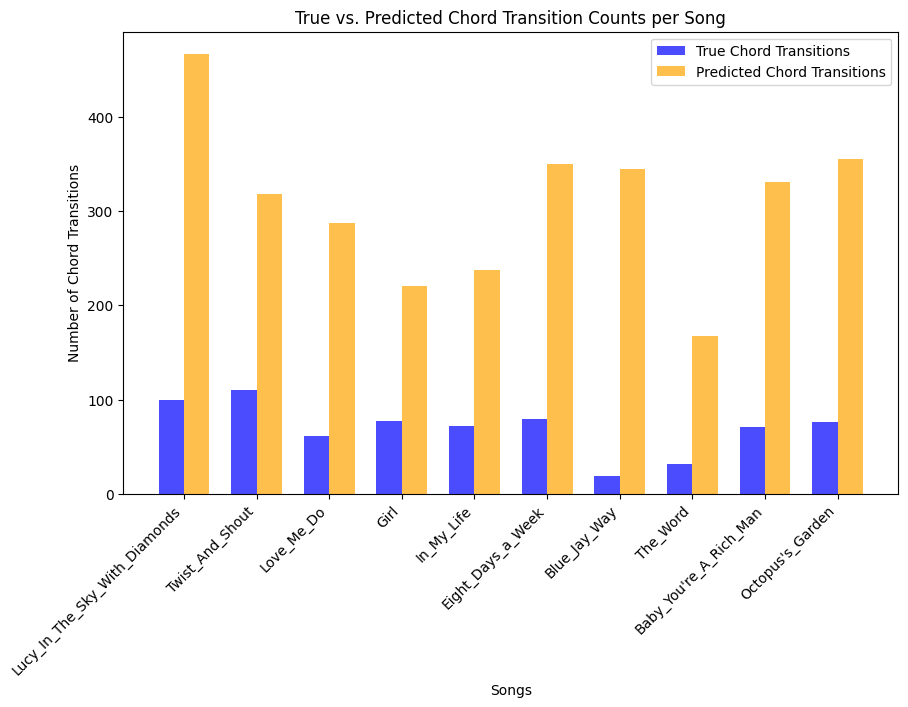

🔹 **Accuracy**: 0.4981
🔹 **F1-score**: 0.5629


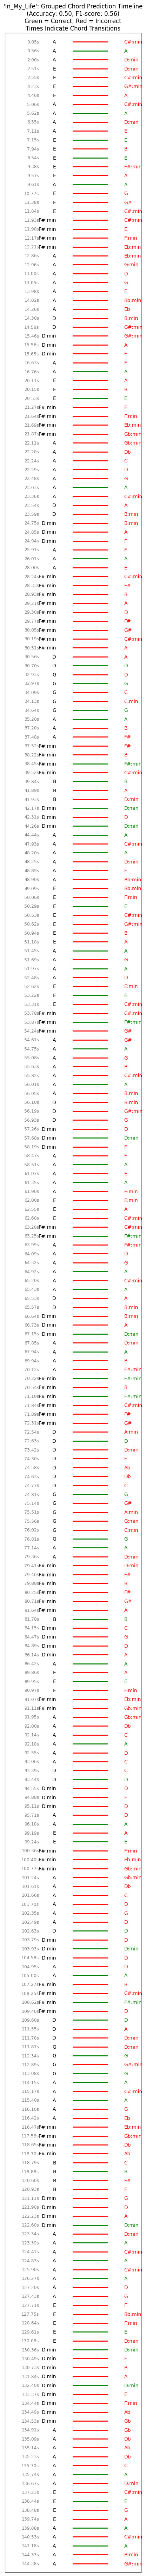

In [12]:
evaluate(results, "In_My_Life")

We try add pooling over beat to minimize over transitioning

In [4]:
# train on 40 songs

songs = []
for file_name in os.listdir('lab_and_audio_files'):
    if(file_name.endswith('.mp3')):
        song_name = file_name[:-4]
        songs.append(song_name)

h_markov_model, ix_2_chord = run_training_pipeline(songs[:40], remove_percussive=True)

In [ ]:
results = {}
for song in songs[-10:]:
    results[song] = get_predictions(
        h_markov_model, ix_2_chord, song, remove_percussive=True, pool_to_beats=True
    )

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?



🔹 **Chord Prediction Evaluation Across All Songs** 🔹

🎵 Lucy_In_The_Sky_With_Diamonds: Accuracy = 0.2899, F1-score = 0.2660
🎵 Twist_And_Shout: Accuracy = 0.2671, F1-score = 0.3230
🎵 Love_Me_Do: Accuracy = 0.3694, F1-score = 0.3621
🎵 Girl: Accuracy = 0.0145, F1-score = 0.0208
🎵 In_My_Life: Accuracy = 0.4875, F1-score = 0.4447
🎵 Eight_Days_a_Week: Accuracy = 0.4396, F1-score = 0.4072
🎵 Blue_Jay_Way: Accuracy = 0.6527, F1-score = 0.6712
🎵 The_Word: Accuracy = 0.3379, F1-score = 0.3392
🎵 Baby_You're_A_Rich_Man: Accuracy = 0.5275, F1-score = 0.4952
🎵 Octopus's_Garden: Accuracy = 0.2500, F1-score = 0.2282

🔹 **Overall Performance Across All Songs** 🔹
🎶 Overall Accuracy = 0.3683
🎶 Overall F1-score = 0.3710



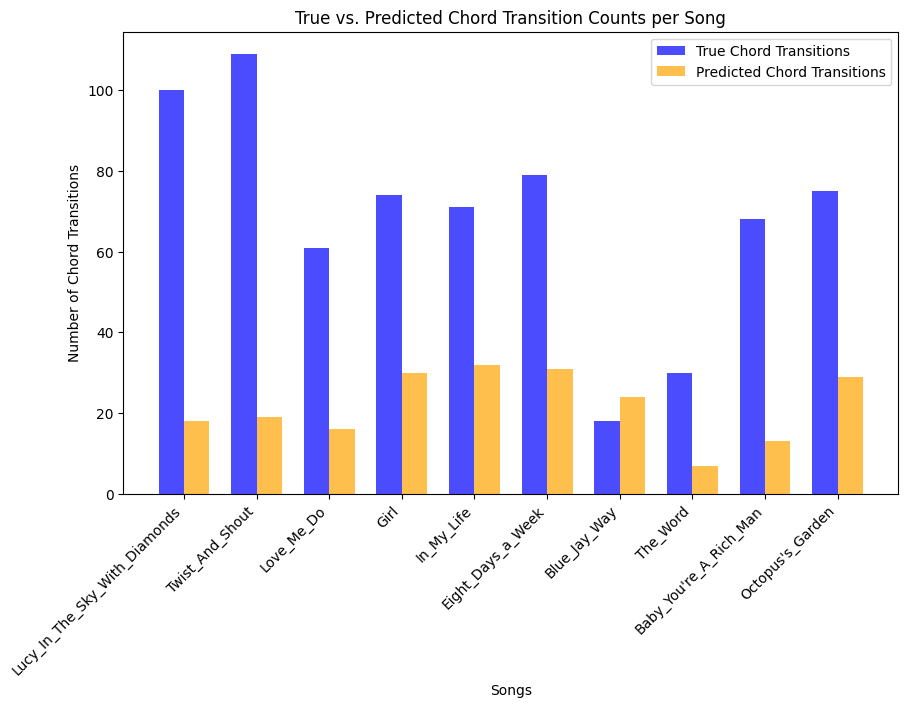

🔹 **Accuracy**: 0.4875
🔹 **F1-score**: 0.4447


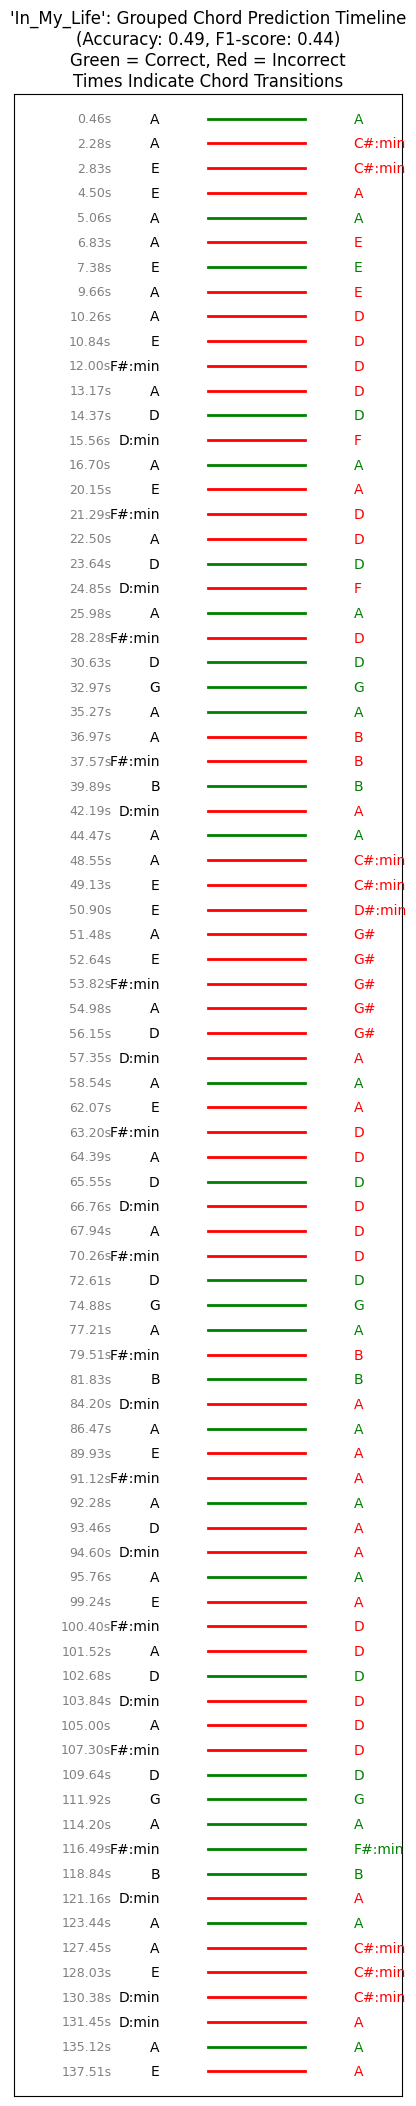

In [8]:
evaluate(results, "In_My_Life")

We try to use the pre-trained VGGish representation:

In [3]:
# train on 40 songs

songs = []
for file_name in os.listdir('lab_and_audio_files'):
    if(file_name.endswith('.mp3')):
        song_name = file_name[:-4]
        songs.append(song_name)

h_markov_model, ix_2_chord = run_training_pipeline(songs[:1], remove_percussive=True, add_vggish=True)

136/136 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step


/Users/roybh/.pyenv/versions/chord_recognition/lib/python3.11/site-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/roybh/.pyenv/versions/chord_recognition/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/roybh/.pyenv/versions/chord_recognition/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
results = {}
for song in songs[-10:]:
    results[song] = get_predictions(
        h_markov_model, ix_2_chord, song, remove_percussive=True, pool_to_beats=True, add_vggish=True
    )

In [ ]:
evaluate(results, "In_My_Life")